# Project: FBI Gun Data - Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we will be looking at the 'FBI Gun Data' dataset, which is extracted from the FBI's NICS (**National Instant Criminal Background Check System**). This system gives gun sellers instant access to prospective buyer's criminal background, which in turn helps them determine their elegibility to buy firearms or explosives.
>
>We are interested in exploring the gun market over the different states and how responsible are they when it comes to selling firearms. We will explore trends among buyers of various demographics. Then, we will see what conclusions we have arrived to throughout our analysis journey.
>
>Questions:
>
>1- Which states had the highest growth in gun registrations?
>
>2- What do the top 5 states in gun activity have common in regards to census data?
>
>3- What is the top state in handgun ownership?
>
>4- What is the top state in long gun ownership?
>
>5- What is the top state in multiple fire arm (guns, explosives, ..etc) ownership?

First of all, we start by importing our libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

Then, we load our datasets and explore them breifly:

In [2]:
df_cen = pd.read_csv('U.S. Census Data.csv')
df_cen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
df_gun = pd.read_excel('gun_data.xlsx')
df_gun.head(15)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


Here we will try to get an idea of how they look like and their dimensions:

In [4]:
df_cen.shape, df_gun.shape

((85, 52), (12485, 27))

Now let's take a look at their types:

In [5]:
df_cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [6]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

And some useful info about them:

In [7]:
df_cen.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Persons under 5 years, percent, April 1, 2010",(c),"1,634,391",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,0.063,0.048,50.40%,2.50%,"625,741",2.62,80.00%,1.50%,"139,500",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [8]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


## Data Cleaning:

#### After looking at both datasets, it is apparent that one (census) offers info on the general population in the 50 states, while the other (gun) offers info on the no. of permits, types of guns....etc. aquired across the 50 states.

We can try to see if we could make sense of that and build relations, but first let's begin cleaning our data!

### A) Let's start with the gun dataset:

Let's take a look at the NaN values:

In [9]:
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Now, to drop the columns we do not need.
We are only interested in looking at the **first 9 columns** and **the last one (totals)**, so I am going to drop the rest as they are irrelevant to our questions.

In [10]:
gun_drop_col = np.arange(9, 26)
df_gun.drop(df_gun.columns[gun_drop_col], axis=1, inplace=True)

Let us validate our previous action:

In [11]:
df_gun.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,77390


In [12]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12485 non-null  object 
 1   state           12485 non-null  object 
 2   permit          12461 non-null  float64
 3   permit_recheck  1100 non-null   float64
 4   handgun         12465 non-null  float64
 5   long_gun        12466 non-null  float64
 6   other           5500 non-null   float64
 7   multiple        12485 non-null  int64  
 8   admin           12462 non-null  float64
 9   totals          12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 975.5+ KB


In [13]:
df_gun.tail(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
12475,1998-11,Tennessee,0.0,NaN,19.0,85.0,NaN,3,0.0,107
12476,1998-11,Texas,0.0,NaN,1384.0,1349.0,NaN,60,1.0,2794
12477,1998-11,Utah,0.0,NaN,98.0,169.0,NaN,0,0.0,267
12478,1998-11,Vermont,0.0,NaN,23.0,35.0,NaN,0,1.0,59
12479,1998-11,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,0
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,107


Okay... this looks a bit better.

Now, let's remove the rows with NaN values:

In [14]:
df_gun.dropna(axis = 0, inplace = True)

and remove any duplicates...

In [15]:
sum(df_gun.duplicated())

0

Let's take a look at the DS after cleaning:

In [16]:
df_gun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...
1095,2016-02,Virginia,784.0,0.0,30085.0,15948.0,1133.0,0,0.0,47955
1096,2016-02,Washington,15736.0,0.0,20583.0,11991.0,1832.0,863,1.0,56043
1097,2016-02,West Virginia,3527.0,0.0,10746.0,7436.0,357.0,757,5.0,27216
1098,2016-02,Wisconsin,9420.0,0.0,19465.0,12431.0,821.0,62,0.0,42855


Much better!

Let's start exploring our data.

df_gun.shape

In [17]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           1100 non-null   object 
 1   state           1100 non-null   object 
 2   permit          1100 non-null   float64
 3   permit_recheck  1100 non-null   float64
 4   handgun         1100 non-null   float64
 5   long_gun        1100 non-null   float64
 6   other           1100 non-null   float64
 7   multiple        1100 non-null   int64  
 8   admin           1100 non-null   float64
 9   totals          1100 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 94.5+ KB


Ok, let's drop the U.S territories that are not included in the census data.

In [18]:
drop_rows = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']

df_gun = df_gun[~df_gun['state'].isin(drop_rows)]

Now the gun data is faithful to the census data!

### Now let's clean the census dataset:

In [19]:
df_cen.tail(22)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 2nd column and rows 64-84 need to be dropped.

In [20]:
df_cen.drop(columns = ['Fact Note'], inplace = True)

In [21]:
cen_drop_row = np.arange(64, 85)

df_cen.drop(np.r_[64:82], inplace = True)

In [22]:
df_cen.drop(np.r_[82], inplace = True)

Validating action:

In [23]:
df_cen

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
83,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It could be more readable if we switched the rows with the columns. Let's use the **Transpose**:

In [24]:
df_cen_tran = df_cen.T
df_cen_tran

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33",NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95",NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08",NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48",NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22",NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89",NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36",NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54",NaN,NaN
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76",NaN,NaN


This looks a lot better, but we could still see some things that need to be taken care of to avoid descrepancies, like:

>We need to keep only the columns that we are interested in in the census dataset to avoid cluter. We could Drop the rest!

Let's start:

In [25]:
df_cen_tran.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,56,57,58,59,60,61,62,63,83,84
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33",NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95",NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08",NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48",NaN,NaN
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22",NaN,NaN
6,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89",NaN,NaN
7,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36",NaN,NaN
8,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54",NaN,NaN
9,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76",NaN,NaN


Now for a quick look at a slice of the data to make sure we have it ready for manipulation:

In [26]:
df_cen_tran.iloc[15:18, np.r_[0, 6, 8, 34:36, 49]]

,0,6,8,34,35,49
Iowa,"3,134,693",23.30%,16.40%,91.50%,26.70%,11.80%
Kansas,"2,907,289",24.60%,15.00%,90.20%,31.00%,12.10%
Kentucky,"4,436,974",22.80%,15.60%,84.20%,22.30%,18.50%


Perfect! Let's try and answer our questions:

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Which states had the highest growth in gun registrations?

First let's change the "month" type to datetime:

In [27]:
df_gun['month'] = pd.to_datetime(df_gun['month'])

<ipython-input-27-07d911c2c856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gun['month'] = pd.to_datetime(df_gun['month'])


In [28]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           1000 non-null   datetime64[ns]
 1   state           1000 non-null   object        
 2   permit          1000 non-null   float64       
 3   permit_recheck  1000 non-null   float64       
 4   handgun         1000 non-null   float64       
 5   long_gun        1000 non-null   float64       
 6   other           1000 non-null   float64       
 7   multiple        1000 non-null   int64         
 8   admin           1000 non-null   float64       
 9   totals          1000 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 85.9+ KB


Now let's try to extract the year from the "month" to a separate column for ease of use:

In [29]:
df_gun['month'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1095    2016
1096    2016
1097    2016
1098    2016
1099    2016
Name: month, Length: 1000, dtype: int64

In [30]:
df_gun['year'] = df_gun['month'].dt.year

<ipython-input-30-89e1e1d8a2d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gun['year'] = df_gun['month'].dt.year


Perfect!

We could take a quick look on the general direaction of means between both years (2016 & 2017):

In [31]:
df_gun.groupby('year').mean()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
year,,,,,,,,
2016,18102.816364,944.118182,13240.176364,10065.818182,988.054545,429.838182,5.538182,45212.540000
2017,16597.877778,1696.193333,11624.620000,7597.982222,614.504444,375.693333,9.973333,39944.311111


Now we have a clearer view of trends of permits and guns from 2016 to 2017!

In [32]:
df_gun.groupby(['year','state']).mean()

permit  permit_recheck       handgun      long_gun  \
year state                                                                     
2016 Alabama        23981.545455        0.000000  11607.090909   9743.454545   
     Alaska           266.272727        0.000000   3148.363636   3149.272727   
     Arizona         7624.818182      464.454545  13730.818182   9134.181818   
     Arkansas        4707.818182      639.636364   6571.818182   6921.636364   
     California     82660.545455        0.000000  46201.454545  47416.363636   
...                          ...             ...           ...           ...   
2017 Virginia        1011.888889        0.000000  23826.222222  14863.666667   
     Washington     13274.111111       64.555556  16038.777778  10513.222222   
     West Virginia   2119.888889        0.000000   6289.000000   5213.111111   
     Wisconsin      15318.666667        0.000000  14421.555556  12002.444444   
     Wyoming          383.000000       18.555556   1545.111111   1680.222222   

                           other    multiple      admin         totals  
year state                                                              
2016 Alabama          439.818182  514.636364   0.454545   49429.909091  
     Alaska           235.363636  195.636364   0.000000    7414.727273  
     Arizona         1092.272727  666.636364   0.000000   34942.636364  
     Arkansas         250.363636  369.090909  13.000000   22325.181818  
     California     18604.818182    0.000000   0.000000  196023.181818  
...                          ...         ...        ...            ...  
2017 Virginia        1063.333333    0.000000   0.000000   40777.111111  
     Washington      1780.222222  632.777778   3.222222   46613.555556  
     West Virginia    257.000000  400.555556   6.666667   16976.000000  
     Wisconsin        753.555556   44.555556   0.000000   43059.666667  
     Wyoming           98.555556   92.333333   4.555556    4192.888889  

[100 rows x 8 columns]

Let us try to sort the values in decending order

In [33]:
df_gun['totals'].sort_values(ascending = False)

18     398706
348    397959
513    397059
73     394718
293    392685
        ...  
67       1079
397      1037
12        948
287       888
452       866
Name: totals, Length: 1000, dtype: int64

Looks like the one with the highest totals is row index no.18!

Easy to tell from the raw data that that is Kentucky, but let's try to see it in terms of gun permits aslo and visually:

In [34]:
permit_means = df_gun.groupby(['year','state'])['permit'].mean()

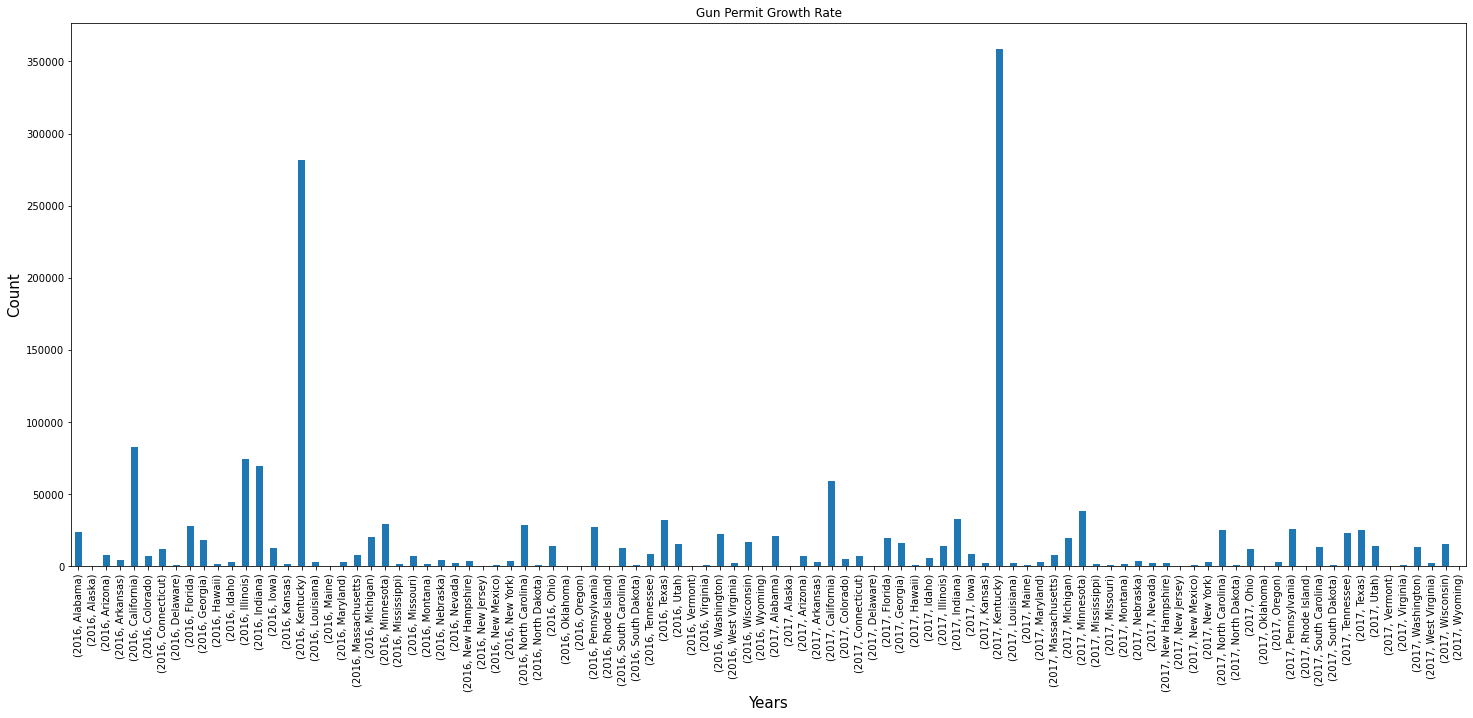

In [35]:
permit_means.plot(kind = 'bar', title = 'Gun Permit Growth Rate',figsize = (25,10))
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

We can see from the above chart that the state of **Kentucky** is the one with the **highest number of permits!**

Let's take a deeper look at this state:

In [36]:
df_gun_K = df_gun.query('state == "Kentucky"')
df_gun_K

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals,year
18,2017-09-01,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,398706,2017
73,2017-08-01,Kentucky,376016.0,0.0,8039.0,6555.0,244.0,459,0.0,394718,2017
128,2017-07-01,Kentucky,374603.0,0.0,7236.0,5118.0,241.0,419,0.0,390494,2017
183,2017-06-01,Kentucky,373842.0,0.0,8765.0,5223.0,265.0,469,0.0,392002,2017
238,2017-05-01,Kentucky,374078.0,0.0,8690.0,5378.0,223.0,433,0.0,391740,2017
293,2017-04-01,Kentucky,372852.0,0.0,9858.0,6519.0,257.0,433,0.0,392685,2017
348,2017-03-01,Kentucky,370113.0,0.0,13769.0,8992.0,347.0,645,0.0,397959,2017
403,2017-02-01,Kentucky,283492.0,0.0,14975.0,8636.0,253.0,1044,0.0,313748,2017
458,2017-01-01,Kentucky,325954.0,0.0,9743.0,6700.0,292.0,397,0.0,345924,2017
513,2016-12-01,Kentucky,358510.0,0.0,17311.0,16766.0,371.0,673,0.0,397059,2016


Here I will attempt to use masks to facilitate the separation of both years

In [37]:
df_gun_K17 = df_gun_K.query('year == "2017"')
df_gun_K16 = df_gun_K.query('year == "2016"')

In [38]:
dfgun_K16_permit_sum = df_gun_K16.permit.sum()
dfgun_K16_permit_sum

3095198.0

In [39]:
dfgun_K17_permit_sum = df_gun_K17.permit.sum()
dfgun_K17_permit_sum

3229334.0

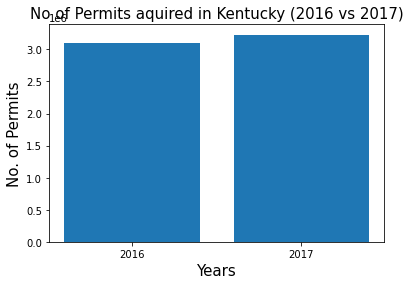

In [40]:
plt.bar(['2016', '2017'] , [dfgun_K16_permit_sum, dfgun_K17_permit_sum])
plt.title('No of Permits aquired in Kentucky (2016 vs 2017)', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('No. of Permits', fontsize = 15);

It looks like the no. of permits increased from 2016 to 2017

Now let's look at the type of guns in both years:

Handguns and Long guns in 2016:

In [41]:
df_gun_K16_hand_sum = df_gun_K16.handgun.sum()
df_gun_K16_hand_sum

126874.0

In [42]:
df_gun_K16_long_sum = df_gun_K16.long_gun.sum()
df_gun_K16_long_sum

101317.0

Handguns and Long guns in 2017:

In [43]:
df_gun_K17_hand_sum = df_gun_K17.handgun.sum()
df_gun_K17_hand_sum

89187.0

In [44]:
df_gun_K17_long_sum = df_gun_K17.long_gun.sum()
df_gun_K17_long_sum

60664.0

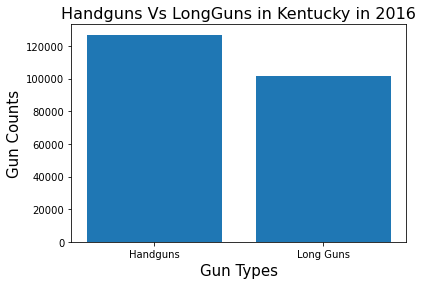

In [45]:
plt.bar(['Handguns', 'Long Guns'] , [df_gun_K16_hand_sum, df_gun_K16_long_sum])
plt.title('Handguns Vs LongGuns in Kentucky in 2016', fontsize = 16)
plt.xlabel('Gun Types', fontsize = 15)
plt.ylabel('Gun Counts', fontsize = 15);

From the above, we can see that people got more handguns than long guns in Kentucky in 2016

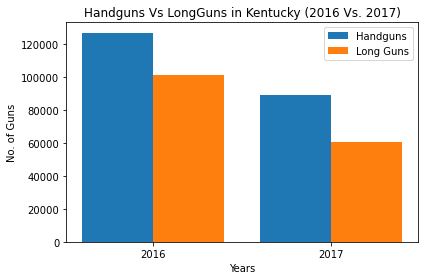

In [46]:
labels = ['2016', '2017']
handgun_sums = [df_gun_K16_hand_sum, df_gun_K17_hand_sum]
longgun_sums = [df_gun_K16_long_sum, df_gun_K17_long_sum]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, handgun_sums, width, label='Handguns')
rects2 = ax.bar(x + width/2, longgun_sums, width, label='Long Guns')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Guns')
ax.set_xlabel('Years')
ax.set_title('Handguns Vs LongGuns in Kentucky (2016 Vs. 2017)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

From the chart above we can see that, generally speaking, the sales of both handguns and long guns in Kentucky went down from 2016 to 2017

Now let's take a wider look at the top 10 states in terms of fire arm usage:

In [47]:
guns_16 = df_gun.query('year == "2016"')

In [48]:
gun_totals_16 = guns_16.groupby(['year', 'state'])['totals'].sum().sort_values(ascending = False)

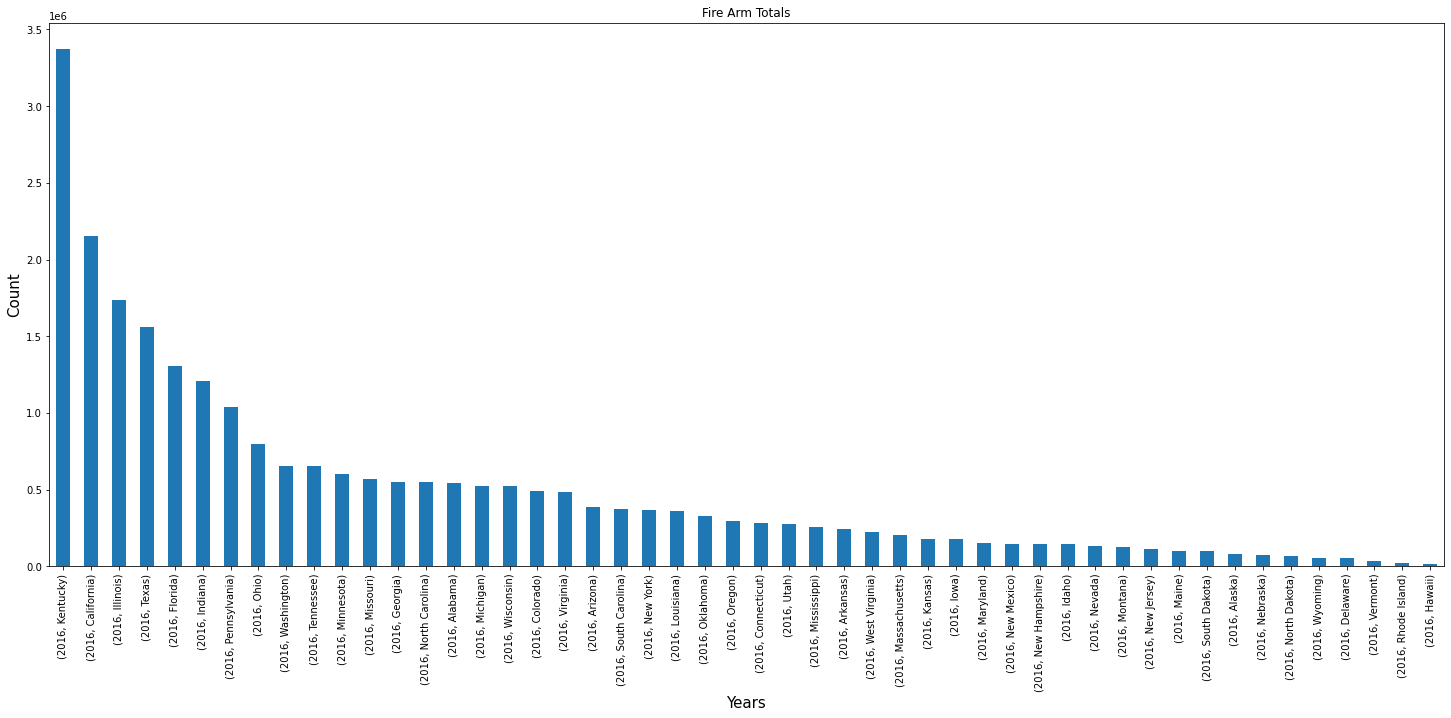

In [49]:
gun_totals_16.plot(kind = 'bar', title = 'Fire Arm Totals',figsize = (25,10))
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

And by that we can conclude the **top 10 states** in gun activity for 2016!

In [50]:
gun_totals_16.head(10)

year  state       
2016  Kentucky        3374464
      California      2156255
      Illinois        1734670
      Texas           1557638
      Florida         1309405
      Indiana         1205833
      Pennsylvania    1041050
      Ohio             799506
      Washington       655946
      Tennessee        651985
Name: totals, dtype: int64

...and the same for 2017

In [51]:
guns_17 = df_gun.query('year == "2017"')

In [52]:
gun_totals_17 = guns_17.groupby(['year', 'state'])['totals'].sum().sort_values(ascending = False)

In [53]:
gun_totals_17.head()

year  state     
2017  Kentucky      3417976
      California    1167528
      Illinois      1163945
      Texas         1074971
      Florida        912765
Name: totals, dtype: int64

### Q2: What do the top 5 states in gun activity have common in regards to census data?

#### That means we need to take a closer look at Kentucky, California and Illinois:


In [54]:
df_cen_tran.iloc[np.r_[4, 8, 12, 16, 42], np.r_[21, 49]]

,21,49
Arkansas,4.70%,17.20%
Delaware,8.70%,11.70%
Idaho,6.10%,14.40%
Kansas,6.90%,12.10%
Tennessee,0.048,0.158


After skimming our data for a good while, there is a noticable correlation between the top 5 states in __gun ownership__ and having a higher percentage of:

**1- People Living in Poverty**

**2- Foreign Born Persons**

## Now, Let us look at one variable at a time: (Univariate analysis requested to be added by reviewer)

df_cen_tran.iloc[np.r_[4, 8, 12, 16, 42], np.r_[21, 49]]

 create data: an array of values
size_of_groups=[12,11,3,30]

plt.pie(size_of_groups, labels= ['California', 'Florida', 'Illinois', 'Kentucky', 'Texas'])
plt.show()

1) We look at the distribution of handguns across the states:

In [55]:
handgun_sums = df_gun.groupby(['state']).agg({'handgun':'sum'})
handgun_sums

,handgun
state,
Alabama,196463.0
Alaska,59228.0
Arizona,262618.0
Arkansas,123347.0
California,888479.0
Colorado,381123.0
Connecticut,163617.0
Delaware,39635.0
Florida,1059824.0


1) We look at the distribution of handguns across the states:

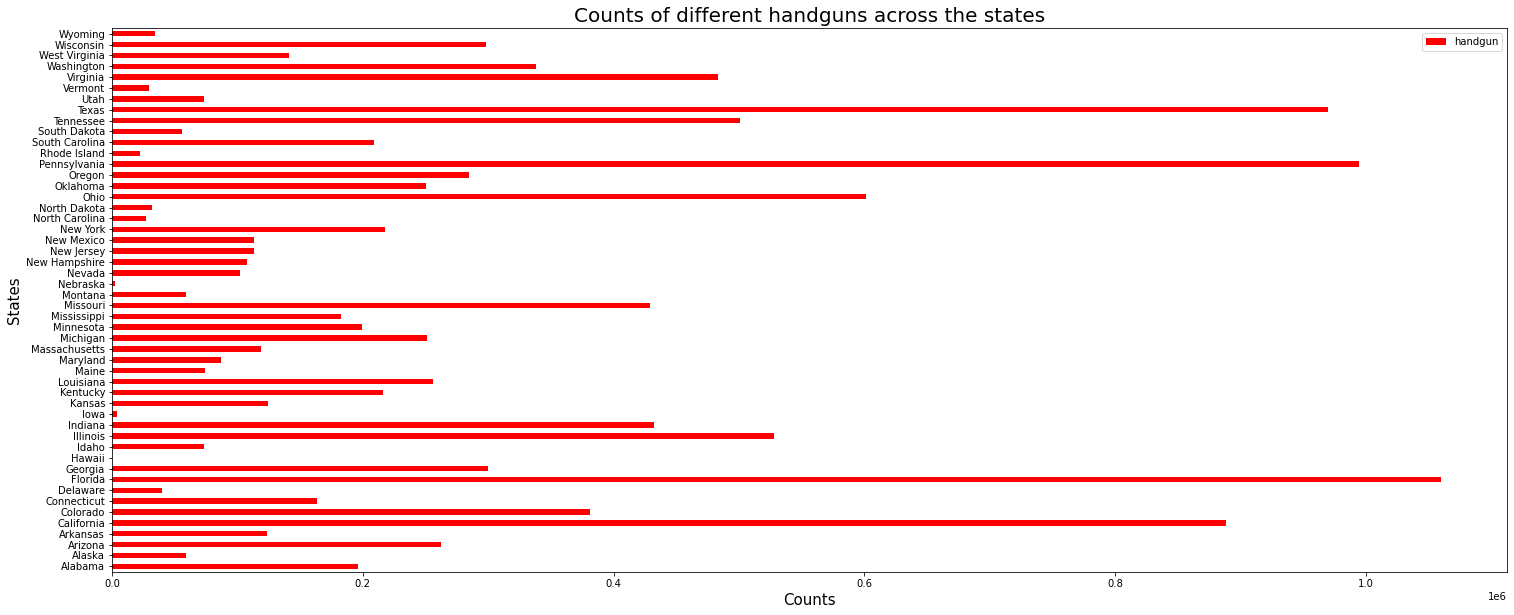

In [56]:
handgun_sums.plot(kind = 'barh',figsize = (25,10), color = 'red')
plt.title(label ='Counts of different handguns across the states' , fontsize = 20)
plt.xlabel('Counts', fontsize = 15)
plt.ylabel('States', fontsize = 15);

Looks like __Florida__ is the highest state in handgun ownership!

2) We look at the distribution of long guns across the states:

In [57]:
longgun_sums = df_gun.groupby(['state']).agg({'long_gun':'sum'})
longgun_sums

,long_gun
state,
Alabama,158949.0
Alaska,57053.0
Arizona,168507.0
Arkansas,120805.0
California,742814.0
Colorado,278726.0
Connecticut,57742.0
Delaware,32249.0
Florida,475156.0


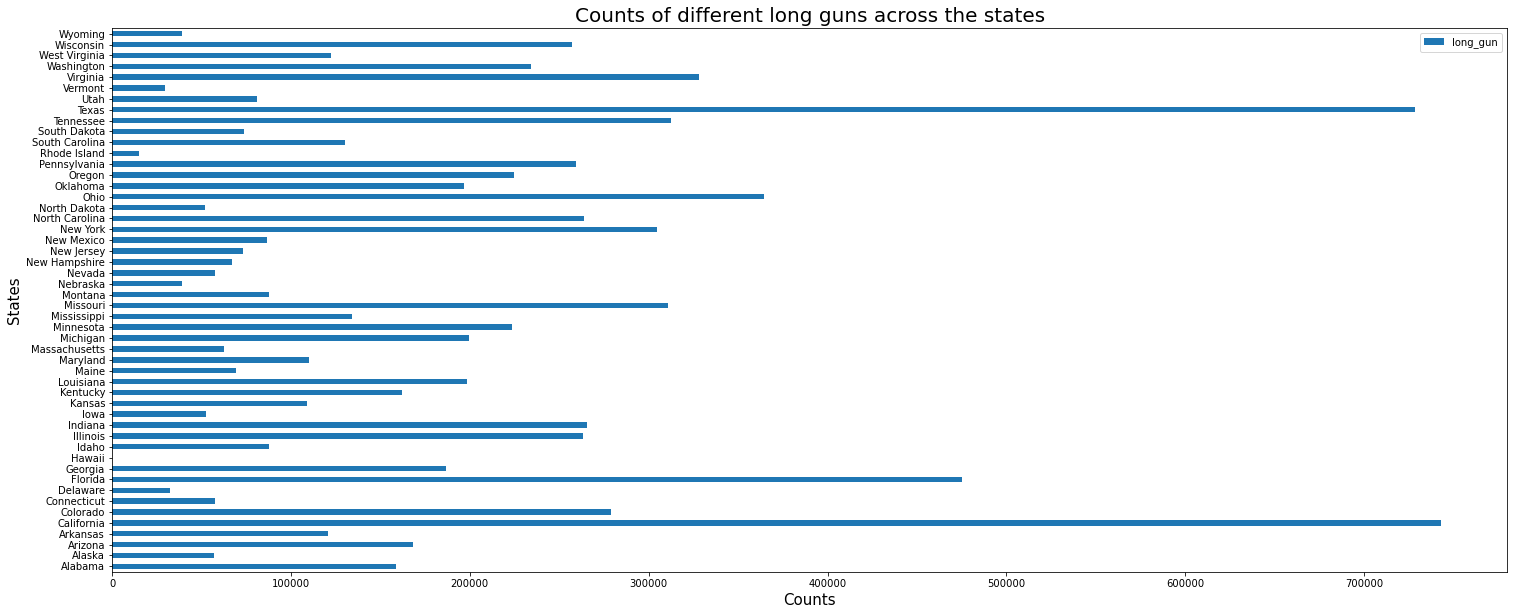

In [58]:
longgun_sums.plot(kind = 'barh',figsize = (25,10))
plt.title(label ='Counts of different long guns across the states' , fontsize = 20)
plt.xlabel('Counts', fontsize = 15)
plt.ylabel('States', fontsize = 15);

Looks like __California__ is the highest state in long gun ownership!

3) We look at the distribution of ownership of **more than one type** of fire arms at once across the states:

In [59]:
multiple_sums = df_gun.groupby(['state']).agg({'multiple':'sum'})
multiple_sums

,multiple
state,
Alabama,8621
Alaska,3760
Arizona,13129
Arkansas,7214
California,0
Colorado,22671
Connecticut,0
Delaware,1643
Florida,40657


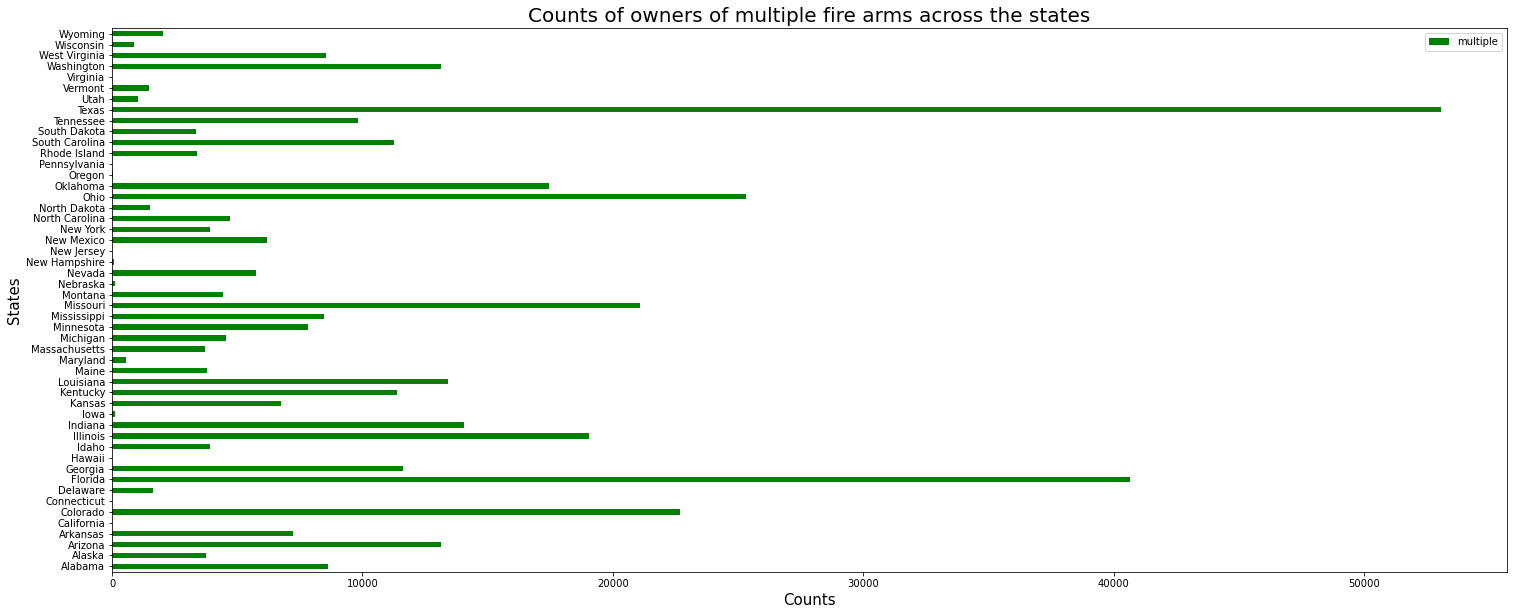

In [60]:
multiple_sums.plot(kind = 'barh',figsize = (25,10), color = 'green')
plt.title(label ='Counts of owners of multiple fire arms across the states' , fontsize = 20)
plt.xlabel('Counts', fontsize = 15)
plt.ylabel('States', fontsize = 15);

__Texas__ easily wins this one. It is the highest state in ownership of multiple fire arms!

### By this, we can presume that:
>- States with a higher percentage of poor people have higher gun ownership, which is maybe related to their living conditions being tough, or their environment being more hostile.
>- States with more foreigners who are starting families, are maybe more concerned with the safety of their families and get gun permits for protection.
>- Florida scores the highest with handguns.
>- California scores the highest with long guns.
>- Texas scores the highest with multiple fire arms(guns, explosives, ..etc)

<a id='conclusions'></a>
## Conclusions

> **The Good:** 
>- The data presented above was very rich and diverse.
>- It also had a very wide range and dated several years back which elevates it level of integrity.
>- The info proved some correlations across the different datasets, which proves that there is a relationship between states with higher gun ownership and other variables.

> **The Limitations:**
>- Although the census data proveded is diverse, there was no clear, factual evidence tying a certain segment of the population to gun ownership (e.g: crime rates, previous criminal record, homicide rates)
>- The census data was on a state level and due to its sensitivy, we were not able to specifically analyze the buyer profile
>- The census data had the 50 states only and not the other US terrortories, which created descripancies.